# Save and load results as HDF5 files

In [5]:
import pypesto
import numpy as np
import scipy as sp
import pypesto.optimize as optimize
import matplotlib.pyplot as plt
from pypesto.store import (save_to_hdf5, read_from_hdf5)
import tempfile

%matplotlib inline

This notebook we will demonstrate, how to save and (re-)load optimization results and traces to a `.hdf5` file. The use case of this notebook is to generate visulaizations from reloaded optimization results and traces.

## Define the objective and problem

In [10]:
objective = pypesto.Objective(fun=sp.optimize.rosen, 
                              grad=sp.optimize.rosen_der, 
                              hess=sp.optimize.rosen_hess)

dim_full = 20
lb = -5 * np.ones((dim_full, 1))
ub = 5 * np.ones((dim_full, 1))

problem = pypesto.Problem(objective=objective, lb=lb, ub=ub)

## Define history options and run optimization

In [11]:
# create optimizers
optimizer = optimize.ScipyOptimizer()

# set number of starts
n_starts = 10

# save optimizer trace (to temporary file fn)
fn = tempfile.mktemp(".hdf5")
history_options = pypesto.HistoryOptions(trace_record=True, storage_file=fn)

# Run optimizaitons
result = optimize.minimize(
    problem=problem, optimizer=optimizer,
    n_starts=n_starts, history_options=history_options)

start 0 failed: 
start 1 failed: 
start 2 failed: 
start 3 failed: 
start 4 failed: 
start 5 failed: 
start 6 failed: 
start 7 failed: 
start 8 failed: 
start 9 failed: 


## Plot result

We now want to plot the results (before saving).

ValueError: Axis limits cannot be NaN or Inf

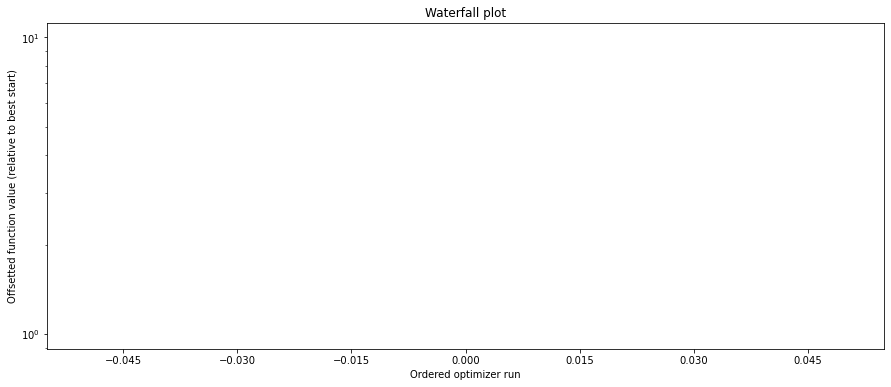

In [8]:
import pypesto.visualize

# plot waterfalls
pypesto.visualize.waterfall(result, size=(15,6))

## Plot trace

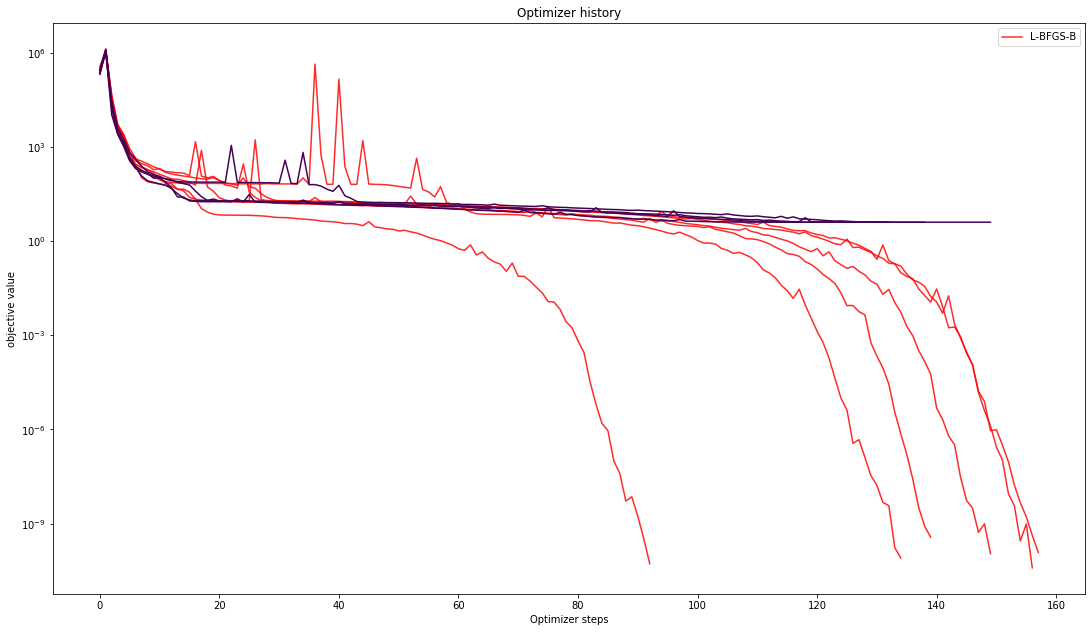

In [5]:
pypesto.visualize.optimizer_history(result,
                                    legends=['L-BFGS-B'])

## Save optimization result as HDF5 file

In [6]:
# name of the (in this case temporary) file
fn = tempfile.mktemp(".hdf5")

# Write result
hdf5_writer = save_to_hdf5.OptimizationResultHDF5Writer(fn)
hdf5_writer.write(result, overwrite=True)

# Write problem
hdf5_writer = save_to_hdf5.ProblemHDF5Writer(fn)
hdf5_writer.write(problem)

## Reload results

In [7]:
# Read result and problem
hdf5_reader = read_from_hdf5.OptimizationResultHDF5Reader(fn)
result = hdf5_reader.read()

## Plot (reloaded) results

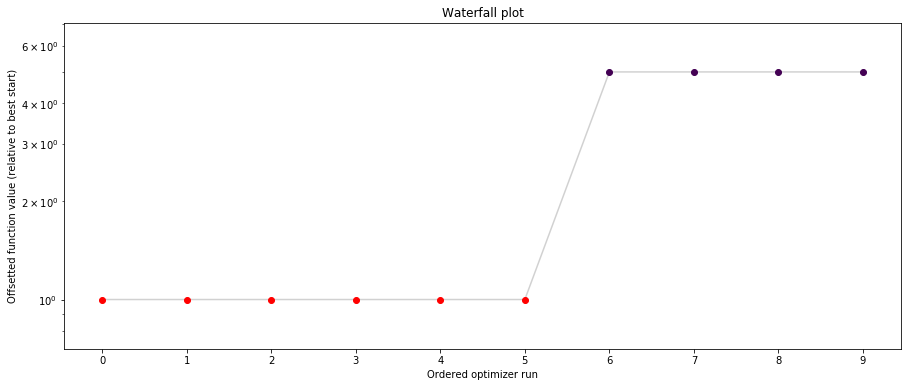

In [8]:
# plot waterfalls
pypesto.visualize.waterfall(result, size=(15,6))

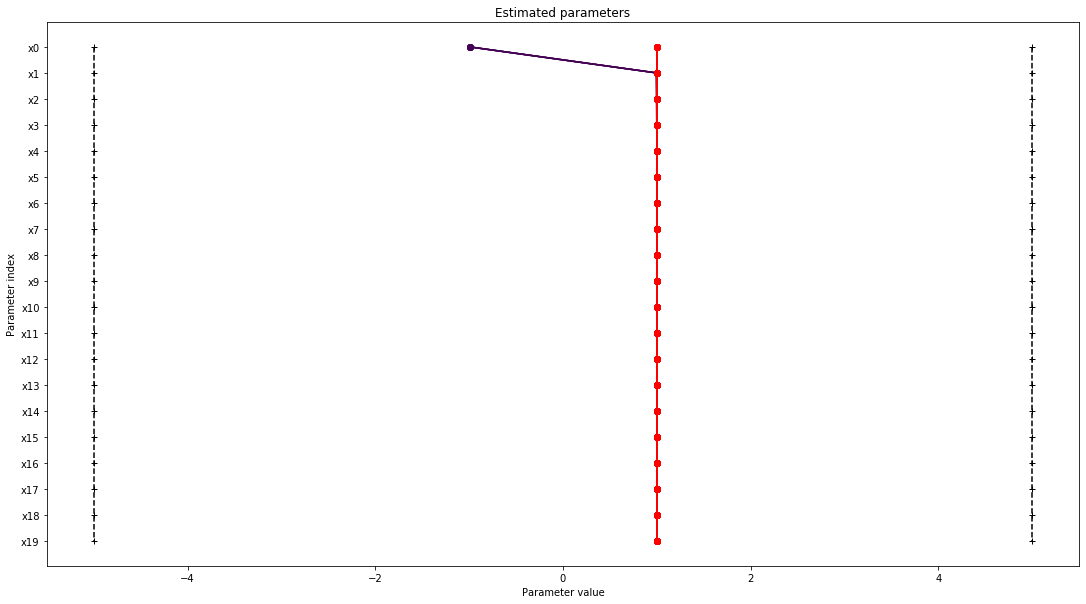

In [9]:
pypesto.visualize.parameters(result,
                            balance_alpha=False)

## Plot (reloaded) traces

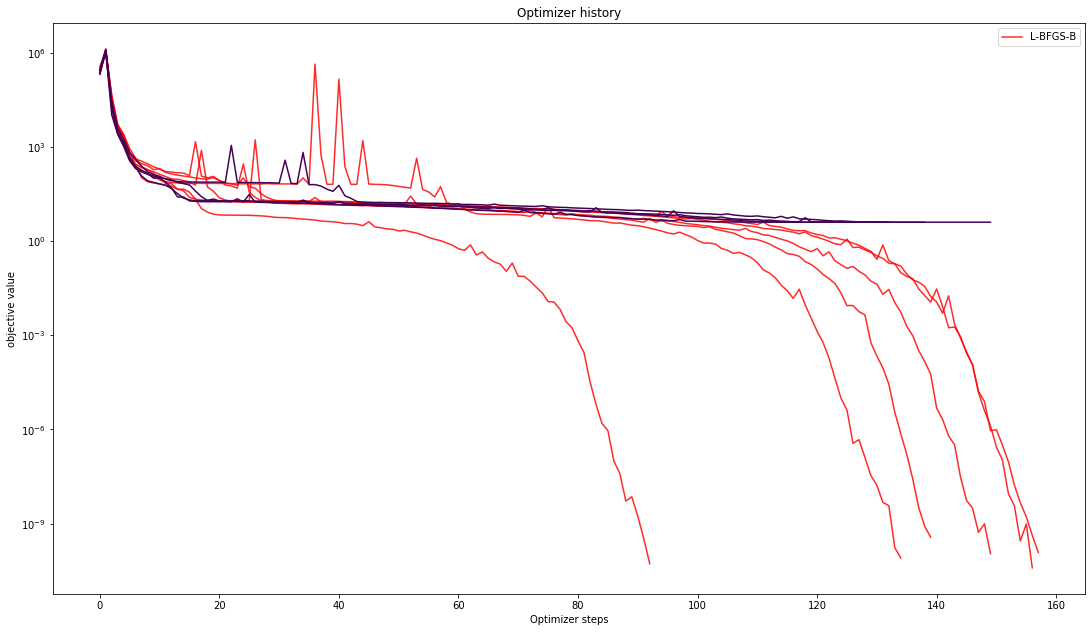

In [10]:
pypesto.visualize.optimizer_history(result,
                                    legends=['L-BFGS-B'])